In [1]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import nltk.data
import pandas as pd

In [2]:
train = pd.read_csv("models/labeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3)
test = pd.read_csv("models/testData.tsv", header=0, delimiter="\t", quoting=3)
unlabeled_train = pd.read_csv("models/unlabeledTrainData.tsv", header=0, 
 delimiter="\t", quoting=3)

In [3]:
def review_to_wordlist( review, remove_stopwords=False ):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()
    #  
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (false by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    #
    # 5. Return a list of words
    return(words)

In [4]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Define a function to split a review into parsed sentences
def review_to_sentences( review, tokenizer, remove_stopwords=False ):
    # Function to split a review into parsed sentences. Returns a 
    # list of sentences, where each sentence is a list of words
    #
    # 1. Use the NLTK tokenizer to split the paragraph into sentences
    raw_sentences = tokenizer.tokenize(review.decode('utf-8').strip())
    #
    # 2. Loop over each sentence
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( review_to_wordlist( raw_sentence, \
              remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [5]:
from multiprocessing.pool import Pool, cpu_count 

In [39]:
def process(review):
    return review_to_sentences(review, tokenizer)[0]

In [40]:
pool = Pool(cpu_count() - 1)

/home/violenta/Envs/california/local/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /usr/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))
/home/violenta/Envs/california/local/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behav

/home/violenta/Envs/california/local/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /usr/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))
/home/violenta/Envs/california/local/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behav

/home/violenta/Envs/california/local/lib/python2.7/site-packages/bs4/__init__.py:219: UserWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/violenta/Envs/california/local/lib/python2.7/site-packages/bs4/__init__.py:219: UserWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/home/violenta/Envs/california/local/lib/python2.7/site-packages/bs4/__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/violenta/Envs/california/local/lib/python2.7/site-packages/bs4/__init__.py:282: UserWarning: "http://ww

    task = get()
    task = get()
    task = get()
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
    racquire()
KeyboardInterrupt
    task = get()
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 378, in get
    task = get()
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
    racquire()
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 376, in get
KeyboardInterrupt
    racquire()
    racquire()
    racquire()
    return recv()
    racquire()
  File "/usr/lib/python2.7/multiprocessing/queues.p

In [47]:
sentences = pool.map(process, train["review"])

In [48]:
sentences += pool.map(process, unlabeled_train["review"])

In [8]:
# sentences = []  # Initialize an empty list of sentences
# ⚠️🔥🚨 ISSO AQUI DEMORA MEU FILHO!!! 
# print("Parsing sentences from training set")
# for review in train["review"][:100]:
#     sentences += review_to_sentences(review, tokenizer)

# print("Parsing sentences from unlabeled set")
# for review in unlabeled_train["review"][:100]:
#     sentences += review_to_sentences(review, tokenizer)

Parsing sentences from training set
Parsing sentences from unlabeled set


In [49]:
def join_sentence(sentence):
    return " ".join(sentence + [""])

In [50]:
meu_testezinho = pool.map(join_sentence, sentences)

In [179]:
sentences_file = open('sentences.txt', 'w')
text = "\n".join(meu_testezinho)
sentences_file.write(text)
sentences_file.close()

In [65]:
words_for_real = " ".join(meu_testezinho)

In [126]:
# text = ""
# for sentence in sentences:
#     text += " ".join(sentence + [""])

In [70]:
file = open('my_text_file', 'w')
file.write(words_for_real)
file.close()

In [44]:
# vectors_file = open('../GloVe/vectors.txt')
# vectors_str = vectors_file.read()
# lines = vectors_str.split('\n')
# print(lines[0])
# print(" ".join(lines[0].split()[1:]))
# int_lines = []
# for i in range(len(lines)):
#     line = lines[i]
#     new_line = str(i+1)
#     new_line += " "
#     new_line += " ".join(line.split()[1:])
#     int_lines.append(new_line)
# print(int_lines[0])
# new_vectors_file = open('../GloVe/vectors.txt', 'w')
# new_vectors_file.write("\n".join(int_lines))
# new_vectors_file.close()

1064 50
50
1 50


In [71]:
file = open('../GloVe/vectors.txt')
my_vocab = file.read().split('\n')
print(len(my_vocab))

15367


In [40]:
print(len(int_lines))

1065


In [73]:
from gensim.models.keyedvectors import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('../GloVe/vectors.txt', binary=False)

In [125]:
# word_vectors.similarity('matrix', 'troy')

print(word_vectors['matrix'])
print(word_vectors['troy'])

[  1.09146997e-01   2.04246998e-01   3.09913009e-01  -2.17954993e-01
   2.32752994e-01  -2.96081007e-01  -5.89740016e-02   6.08709991e-01
   3.42070997e-01   2.06595004e-01   1.02210999e-01   5.02520025e-01
  -3.65642995e-01   1.60613999e-01  -1.71471000e-01  -4.28683996e-01
   4.60829996e-02   3.47294003e-01  -4.11588013e-01   3.12824994e-01
   2.85210997e-01  -3.07244003e-01  -3.46920997e-01   3.76406014e-01
   3.91030014e-02  -2.30756000e-01  -6.95059970e-02  -1.12369001e-01
   1.04610004e-01  -1.62312001e-01   7.57239982e-02   2.40277007e-01
   2.92300005e-02  -1.12448998e-01   1.60179004e-01   3.74307990e-01
  -4.98995006e-01   5.19945979e-01  -3.39280009e-01  -7.03064024e-01
  -7.45529979e-02   2.35140007e-02  -3.40395987e-01  -1.29999999e-05
   2.58985013e-01   4.10753995e-01   5.29375970e-01   2.89896011e-01
   3.71482015e-01   3.91100012e-02]
[-0.003542    0.095368   -0.19772699 -0.43368     0.04375     0.382348
  0.106682   -0.36125299 -0.027586   -0.220817   -0.130244    0.1

In [118]:
word_vectors.most_similar(positive=['bad', 'better'], negative=['good'])

[(u'worse', 0.8721610903739929),
 (u'even', 0.798957884311676),
 (u'than', 0.7318854928016663),
 (u'far', 0.6944096088409424),
 (u'much', 0.685992419719696),
 (u'way', 0.6553654670715332),
 (u'though', 0.6493570804595947),
 (u'just', 0.6469416618347168),
 (u'seen', 0.6467976570129395),
 (u'could', 0.6452891826629639)]

In [129]:
import sys
import codecs
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [130]:
def normalize_list(vals):
    '''
    normalize a list of vectors to range of -1 to 1
    input: list of vectors
    output: normalized list
    '''
    min_val = float(min(vals))
    max_val = float(max(vals))
    output = []
    for val in vals:
        if val < 0:
            val = (val / min_val) * -1
        elif val > 0:
            val = val / max_val
        output.append(val) # note if 0, stays the same :)
    return output

In [173]:
words_to_plot = ['man', 'king', 'woman', 'prince', 'queen', 'john', 'car']

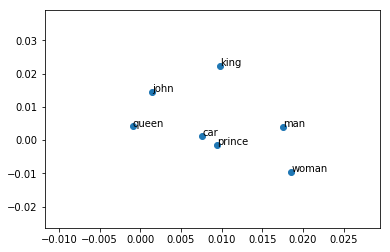

In [174]:
vectors_to_plot = [word_vectors[w] for w in words_to_plot[:10]]
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(vectors_to_plot)
xax = Y[:, 0] * 100 #normalize_list(Y[:, 0])
yax = Y[:, 1] * 100 #normalize_list(Y[:, 1])
plt.scatter(xax, yax)
for label, x, y in zip(words_to_plot[:10], xax, yax):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()
plt.figure.figsize=(20,10)
plt.savefig('test2png.png', dpi=100)

# Passos para o GloVe:

* Formatar o corpus como no arquivo `texto8` (com palavras separadas por espaço)
* Alterar o `demo.sh` para abrir o arquivo com as novas sentenças
* Usar [Gensim](https://radimrehurek.com/gensim/models/keyedvectors.html) para carregar os vetores gerados e rodar as comparações